## Predicting Bug Occurence based on Class Attributes

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [2]:
#load data with random rows to reduce size
train = pd.read_csv('ClassSampleData.csv')

train = train.sample(n=20000, random_state=1)

# look at head of data
train.head()

,Project,CC,CCL,CCO,CI,CLC,CLLC,LDC,LLDC,LCOM5,...,Migration15 Rules,Naming Rules,Optimization Rules,Security Code Guideline Rules,Strict Exception Rules,String and StringBuffer Rules,Type Resolution Rules,Unnecessary and Unused Code Rules,Vulnerability Rules,Number of Bugs
30967,elasticsearch,0.000000,0,0,0,0.000000,0.000000,0,0,2,...,0,0,0,0,0,0,0,0,0,1
64228,elasticsearch,0.576923,1,8,2,0.523810,0.536585,22,22,1,...,0,0,0,0,0,0,0,0,0,0
54703,elasticsearch,0.225859,9,18,18,0.141066,0.151404,135,124,2,...,0,0,0,0,0,25,18,0,0,0
55762,elasticsearch,0.248988,4,14,4,0.232653,0.260870,57,48,1,...,0,0,0,0,0,2,3,0,0,1
25778,elasticsearch,0.000000,0,0,0,0.000000,0.000000,0,0,2,...,0,0,0,0,0,0,0,0,0,2


In [3]:
train.describe()

,CC,CCL,CCO,CI,CLC,CLLC,LDC,LLDC,LCOM5,NL,...,Migration15 Rules,Naming Rules,Optimization Rules,Security Code Guideline Rules,Strict Exception Rules,String and StringBuffer Rules,Type Resolution Rules,Unnecessary and Unused Code Rules,Vulnerability Rules,Number of Bugs
count,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.0,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.0,20000.000000
mean,0.134281,2.339800,14.44420,5.689750,0.117345,0.125519,42.108150,37.165850,2.451900,2.481500,...,0.0,1.460200,0.321550,0.101550,1.228350,1.453700,1.789900,0.471050,0.0,0.728200
std,0.239649,13.565903,233.76991,63.197962,0.219744,0.227173,201.277898,185.519207,4.075146,3.273224,...,0.0,10.193067,1.466446,0.599713,4.245599,6.070997,5.580611,5.428272,0.0,0.967818
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
50%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
75%,0.173725,2.000000,6.00000,2.000000,0.142857,0.162162,27.000000,24.000000,2.000000,3.000000,...,0.0,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.0,1.000000
max,1.000000,499.000000,20998.00000,2463.000000,1.000000,1.000000,6689.000000,5848.000000,101.000000,82.000000,...,0.0,801.000000,39.000000,13.000000,221.000000,227.000000,91.000000,579.000000,0.0,12.000000


In [4]:
# look at infor for columns
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 30967 to 30672
Data columns (total 97 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Project                            20000 non-null  object 
 1   CC                                 20000 non-null  float64
 2   CCL                                20000 non-null  int64  
 3   CCO                                20000 non-null  int64  
 4   CI                                 20000 non-null  int64  
 5   CLC                                20000 non-null  float64
 6   CLLC                               20000 non-null  float64
 7   LDC                                20000 non-null  int64  
 8   LLDC                               20000 non-null  int64  
 9   LCOM5                              20000 non-null  int64  
 10  NL                                 20000 non-null  int64  
 11  NLE                                20000 non-null 

In [5]:
# remove column for unneeded categorical labels
del train['Project']

In [6]:
#set features and predicted value
features = train[train.columns.difference(['Number of Bugs'])]
labels = train['Number of Bugs']

In [7]:
# import packages
import pandas as pd
import numpy as np
import pandas.core.algorithms as algos
from pandas import Series
import scipy.stats.stats as stats
import re
import traceback
import string

#set bin size
max_bin = 20
force_bin = 3

# define a binning function
def mono_bin(Y, X, n = max_bin):
    
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]
    r = 0
    while np.abs(r) < 1:
        try:
            d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.qcut(notmiss.X, n)})
            d2 = d1.groupby('Bucket', as_index=True)
            r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
            n = n - 1 
        except Exception as e:
            n = n - 1

    if len(d2) == 1:
        n = force_bin         
        bins = algos.quantile(notmiss.X, np.linspace(0, 1, n))
        if len(np.unique(bins)) == 2:
            bins = np.insert(bins, 0, 1)
            bins[1] = bins[1]-(bins[1]/2)
        d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.cut(notmiss.X, np.unique(bins),include_lowest=True)}) 
        d2 = d1.groupby('Bucket', as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["MIN_VALUE"] = d2.min().X
    d3["MAX_VALUE"] = d2.max().X
    d3["COUNT"] = d2.count().Y
    d3["EVENT"] = d2.sum().Y
    d3["NONEVENT"] = d2.count().Y - d2.sum().Y
    d3=d3.reset_index(drop=True)
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]       
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    
    return(d3)

def char_bin(Y, X):
        
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]    
    df2 = notmiss.groupby('X',as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["COUNT"] = df2.count().Y
    d3["MIN_VALUE"] = df2.sum().Y.index
    d3["MAX_VALUE"] = d3["MIN_VALUE"]
    d3["EVENT"] = df2.sum().Y
    d3["NONEVENT"] = df2.count().Y - df2.sum().Y
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]      
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    d3 = d3.reset_index(drop=True)
    
    return(d3)

# Weight of Evidence and Information Value function

def data_vars(df1, target):
    
    stack = traceback.extract_stack()
    filename, lineno, function_name, code = stack[-2]
    vars_name = re.compile(r'\((.*?)\).*$').search(code).groups()[0]
    final = (re.findall(r"[\w']+", vars_name))[-1]
    
    x = df1.dtypes.index
    count = -1
    
    for i in x:
        if i.upper() not in (final.upper()):
            if np.issubdtype(df1[i], np.number) and len(Series.unique(df1[i])) > 2:
                conv = mono_bin(target, df1[i])
                conv["VAR_NAME"] = i
                count = count + 1
            else:
                conv = char_bin(target, df1[i])
                conv["VAR_NAME"] = i            
                count = count + 1
                
            if count == 0:
                iv_df = conv
            else:
                iv_df = iv_df.append(conv,ignore_index=True)
    
    iv = pd.DataFrame({'IV':iv_df.groupby('VAR_NAME').IV.max()})
    iv = iv.reset_index()
    return(iv_df,iv)

In [8]:
# Execute funtioon for Weight of Evidence and Information Value
final_iv, IV = data_vars(train, train['Number of Bugs'])

C:\Users\dmeiners\AppData\Roaming\Python\Python37\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\dmeiners\AppData\Roaming\Python\Python37\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\dmeiners\AppData\Roaming\Python\Python37\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\dmeiners\AppData\Roaming\Python\Python37\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\dmeiners\AppData\Roaming\Python\Python37\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\dmeiners\AppData\Roaming\P

In [9]:
#rename var name as index 
IV = IV.rename(columns={'VAR_NAME':'index'})

In [10]:
# sort index accortdingly 
IV.sort_values(['IV'],ascending=0)

,index,IV
62,Number of Bugs,2.008522
49,NLPM,1.119605
51,NM,0.667236
65,PUA,0.639019
82,TNM,0.598186
...,...,...
12,CLLC,0.000000
35,MigratingToJUnit4 Rules,0.000000
16,Comment Rules,0.000000
18,Coupling Rules,0.000000


In [11]:
#calculate Variable Importance

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

clf.fit(features,labels)

preds = clf.predict(features)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(preds,labels)
print(accuracy)

0.98285


In [12]:
#show importance per varible 
from pandas import DataFrame
VI = DataFrame(clf.feature_importances_, columns = ["RF"], index=features.columns)
VI = VI.reset_index()
VI.sort_values(['RF'],ascending=0)

,index,RF
4,CBO,0.031576
72,TLOC,0.030777
71,TLLOC,0.029684
34,LOC,0.029607
65,RFC,0.029426
...,...,...
38,Migration14 Rules,0.000000
1,Android Rules,0.000000
15,Code Size Rules,0.000000
16,Comment Rules,0.000000


In [13]:
#implment Recursive Feature Elimination

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
rfe = RFE(model, 20)
fit = rfe.fit(features, labels)
from pandas import DataFrame
Selected = DataFrame(rfe.support_, columns = ["RFE"], index=features.columns)
Selected = Selected.reset_index()

Selected[Selected['RFE'] == True]

C:\Users\dmeiners\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=20 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\dmeiners\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\dmeiners\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

C:\Users\dmeiners\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\dmeiners\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/sta

C:\Users\dmeiners\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\dmeiners\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/sta

C:\Users\dmeiners\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\dmeiners\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/sta

C:\Users\dmeiners\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\dmeiners\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/sta

C:\Users\dmeiners\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


,index,RFE
4,CBO,True
30,LCOM5,True
31,LDC,True
33,LLOC,True
34,LOC,True
40,NA,True
43,NL,True
45,NLE,True
51,NM,True
52,NOA,True


In [14]:
# calculate Variable Importance with Extratrees Classifier
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(features, labels)

print(model.feature_importances_)

[0.01053406 0.         0.00584082 0.0053627  0.02933263 0.0185467
 0.01854673 0.00895056 0.00984932 0.01911234 0.00880639 0.01191003
 0.01175857 0.01345926 0.00084037 0.         0.         0.01015072
 0.         0.01038391 0.01047509 0.01524577 0.00315268 0.00017264
 0.00373256 0.00025253 0.00669816 0.00361913 0.00570188 0.00132709
 0.0119014  0.00898596 0.00908841 0.02487393 0.02573846 0.
 0.00075103 0.         0.         0.         0.01557974 0.01226167
 0.01838487 0.01199818 0.01237727 0.01171781 0.00899564 0.01467774
 0.0058255  0.01310265 0.00495476 0.01985579 0.01096999 0.00614839
 0.0060952  0.02654177 0.00730913 0.02161649 0.00894766 0.0171333
 0.00876294 0.00846301 0.00494468 0.0086222  0.0138562  0.0266608
 0.00321355 0.00887823 0.00695705 0.020423   0.01411119 0.02536186
 0.02698799 0.01623904 0.01241204 0.01223358 0.0093784  0.01506387
 0.00597967 0.01397728 0.00534242 0.01993204 0.02273289 0.00965091
 0.01773928 0.00864698 0.00965805 0.00577277 0.         0.01952547
 0.   

In [15]:
#create index with variables for results
FI = DataFrame(model.feature_importances_, columns = ["Extratrees"], index=features.columns)
FI = FI.reset_index()
FI.sort_values(['Extratrees'],ascending=0)

,index,Extratrees
4,CBO,0.029333
72,TLOC,0.026988
65,RFC,0.026661
55,NOI,0.026542
34,LOC,0.025738
...,...,...
90,WarningBlocker,0.000000
15,Code Size Rules,0.000000
92,WarningInfo,0.000000
16,Comment Rules,0.000000


In [16]:
#conduct Chi Square anaysis

df1 = train.copy()

from sklearn import preprocessing
from collections import defaultdict
d = defaultdict(preprocessing.LabelEncoder)
# Encoding the categorical variable
fit = df1.apply(lambda x: d[x.name].fit_transform(x))

#Convert the categorical columns based on encoding
for i in list(d.keys()):
    df1[i] = d[i].transform(df1[i])

features1 = df1[df1.columns.difference(['Number of Bugs'])]
labels1 = df1['Number of Bugs']

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

model = SelectKBest(score_func=chi2, k=5)
fit = model.fit(features1, labels1)

import numpy
numpy.set_printoptions(suppress=True)
print(fit.scores_)



[ 15480.82864053             nan    323.04671578   2407.22889028
  15664.55396711  21174.6947524   82847.45547981    462.68351216
   3479.98122355  63678.69035582   1349.84258036  64195.01722476
  60057.92569847  39277.39121234     33.93181854             nan
             nan    286.34442545             nan    131.90650917
  26634.19180597   8945.82197495    180.14325474      6.51599392
    584.78475061      4.15154199   1929.48574441    342.01214941
    335.35786507      9.27032308    186.98675369  11911.60971076
  10859.2347877  203893.8744978  260282.98432545             nan
    779.17162968             nan             nan             nan
   4912.99478516   3350.65109014  45121.96915272    940.34828375
   4133.36606565    635.95196648   4021.98256264  14883.70603185
    278.41306681  10080.0566334    1929.71603496  19998.02366299
    244.68903646   7053.21563124   6669.68240792  42036.73241932
    112.61999384 128352.7051892     963.71195402  12464.74006242
   1163.52506779   1086.3

In [17]:
#create index with variables for results
from pandas import DataFrame
pd.options.display.float_format = '{:.2f}'.format
chi_sq = DataFrame(fit.scores_, columns = ["Chi_Square"], index=features1.columns)

chi_sq = chi_sq.reset_index()

chi_sq.sort_values('Chi_Square',ascending=0)

,index,Chi_Square
72,TLOC,275450.15
34,LOC,260282.98
71,TLLOC,219978.91
33,LLOC,203893.87
82,TNOS,137870.94
...,...,...
38,Migration14 Rules,nan
39,Migration15 Rules,nan
88,Vulnerability Rules,nan
90,WarningBlocker,nan


In [18]:
#conduct Linear feature selection
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(features, labels)
model = SelectFromModel(lsvc,prefit=True)

#create index with variables for results
from pandas import DataFrame
l1 = DataFrame(model.get_support(), columns = ["L1"], index=features.columns)

l1 = l1.reset_index()

l1[l1['L1'] == True]

C:\Users\dmeiners\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


,index,L1
2,Basic Rules,True
3,Brace Rules,True
4,CBO,True
5,CBOI,True
6,CC,True
...,...,...
87,Unnecessary and Unused Code Rules,True
89,WMC,True
91,WarningCritical,True
93,WarningMajor,True


In [19]:
# merge results from feature anbalysis into single graph

from functools import reduce
dfs = [IV, VI, Selected, FI, chi_sq, l1]
final_results = reduce(lambda left,right: pd.merge(left,right,on='index'), dfs)

final_results.head()

,index,IV,RF,RFE,Extratrees,Chi_Square,L1
0,AD,0.06,0.01,False,0.01,15480.83,False
1,Android Rules,0.00,0.00,False,0.00,nan,False
2,Basic Rules,0.03,0.00,False,0.01,323.05,True
3,Brace Rules,0.01,0.00,False,0.01,2407.23,True
4,CBO,0.52,0.03,True,0.03,15664.55,True


In [20]:
#score varibles based on how well they scored in feature selection analysis 

columns = ['IV', 'RF', 'Extratrees', 'Chi_Square']

score_table = pd.DataFrame({},[])
score_table['index'] = final_results['index']

for i in columns:
    score_table[i] = final_results['index'].isin(list(final_results.nlargest(5,i)['index'])).astype(int)
    
score_table['RFE'] = final_results['RFE'].astype(int)
score_table['L1'] = final_results['L1'].astype(int)

score_table['final_score'] = score_table.sum(axis=1)

score_table.sort_values('final_score',ascending=0).head(20)

,index,IV,RF,Extratrees,Chi_Square,RFE,L1,final_score
34,LOC,0,1,1,1,1,1,5
72,TLOC,0,1,1,1,1,1,5
65,RFC,0,1,1,0,1,1,4
4,CBO,0,1,1,0,1,1,4
71,TLLOC,0,1,0,1,1,1,4
40,NA,1,0,0,0,1,1,3
82,TNOS,0,0,0,1,1,1,3
33,LLOC,0,0,0,1,1,1,3
81,TNM,1,0,0,0,1,1,3
64,PUA,1,0,0,0,1,1,3


In [21]:
#set features based on above output
features = train[['LOC', 'RFC','CBO','TLLOC', 'TLOC', 'NA', 'TNOS', 'LLOC', 'TNM', 'PUA', 'NM']]  

C:\Users\dmeiners\AppData\Roaming\Python\Python37\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\dmeiners\AppData\Roaming\Python\Python37\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\dmeiners\AppData\Roaming\Python\Python37\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\dmeiners\AppData\Roaming\Python\Python37\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\dmeiners\AppData\Roaming\Python\Python37\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\dmeiners\AppData\Roaming\P

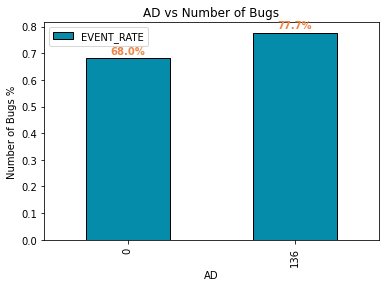

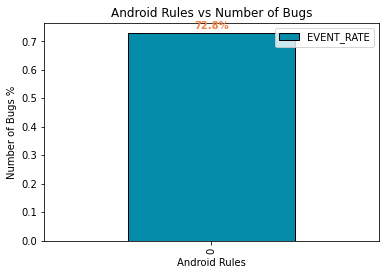

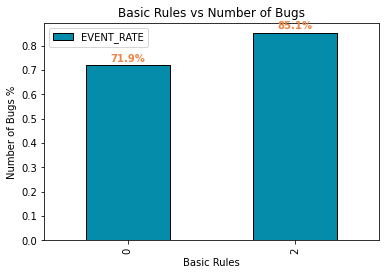

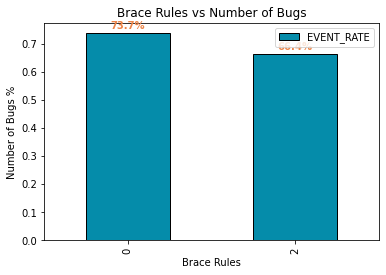

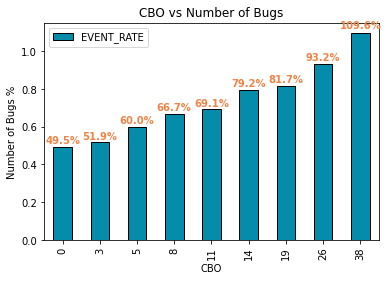

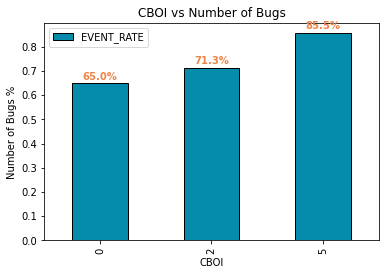

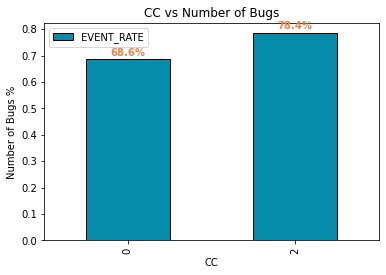

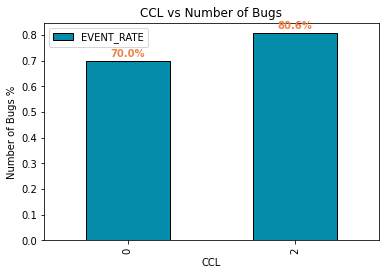

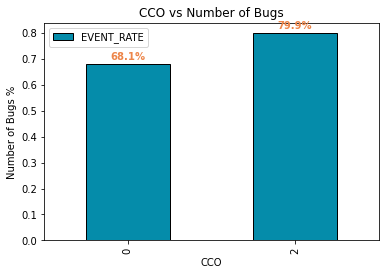

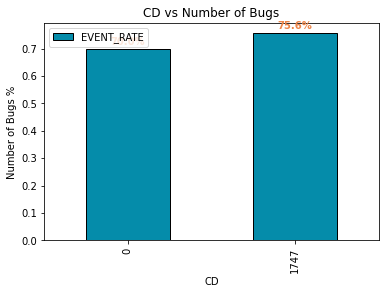

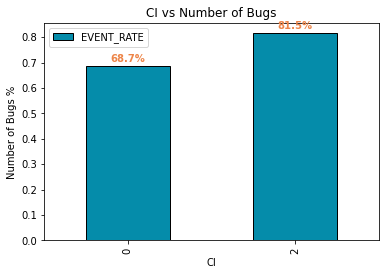

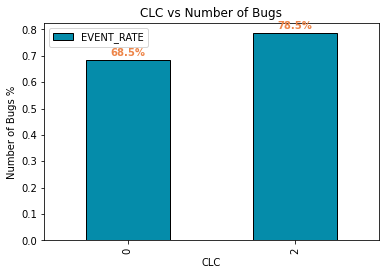

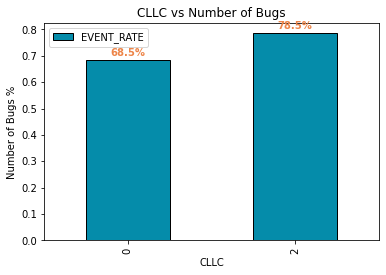

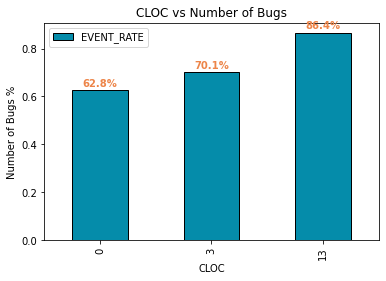

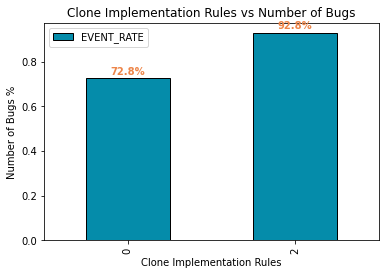

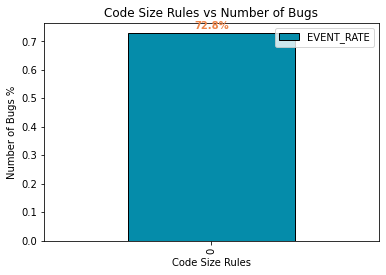

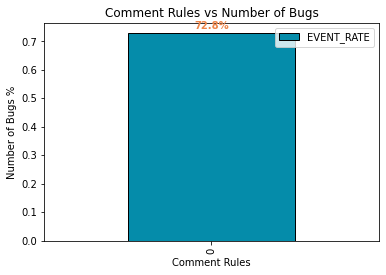

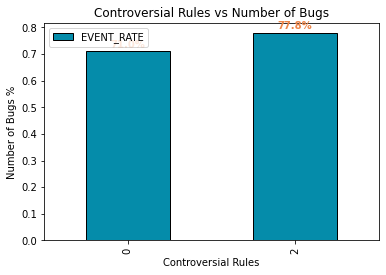

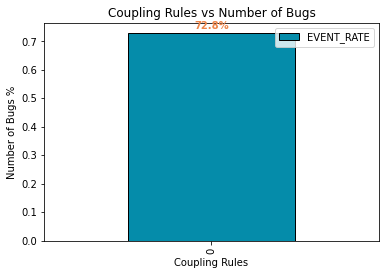

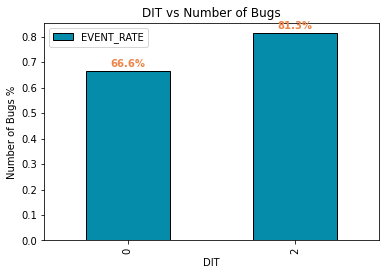

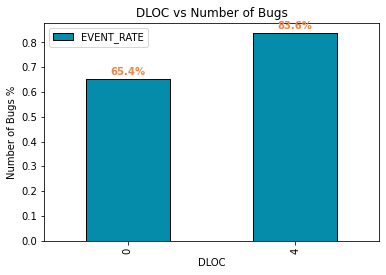

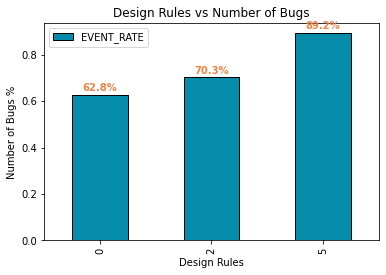

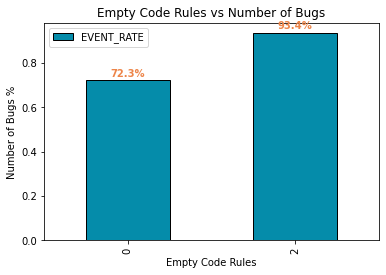

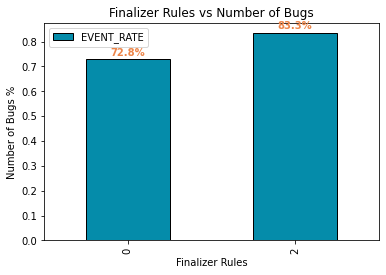

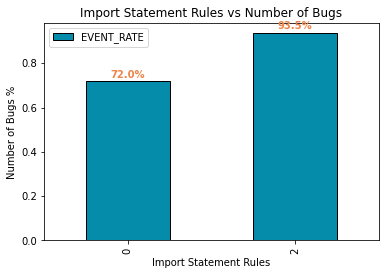

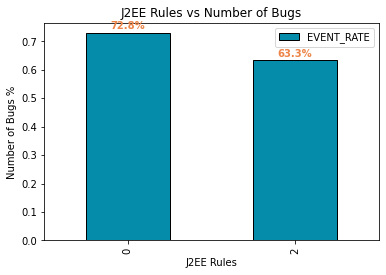

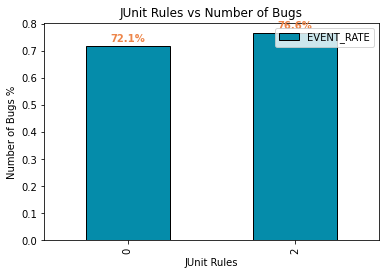

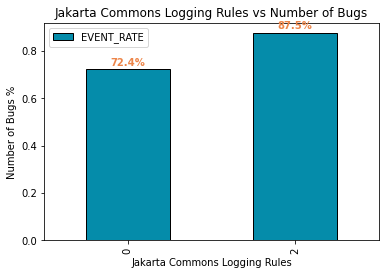

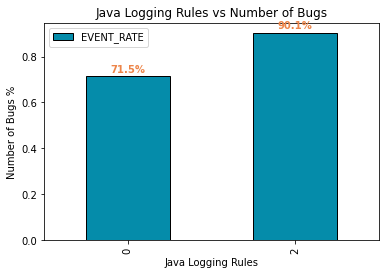

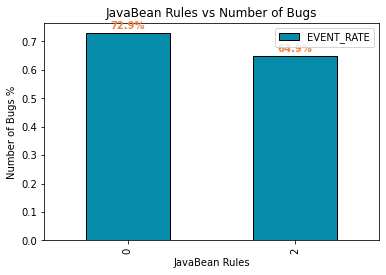

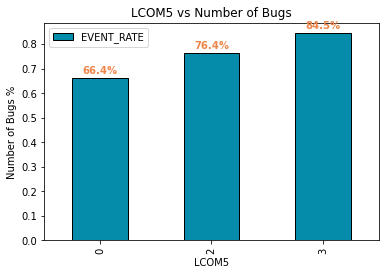

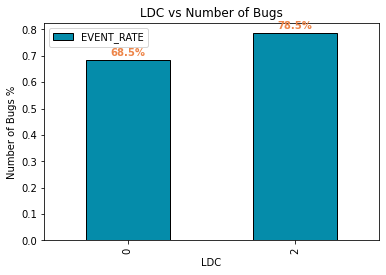

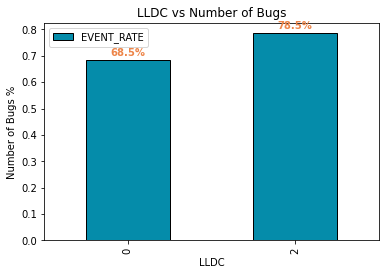

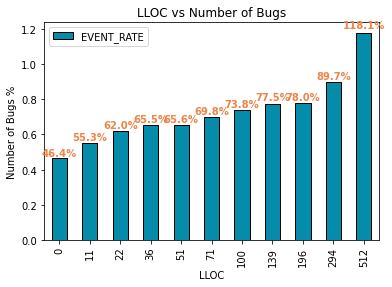

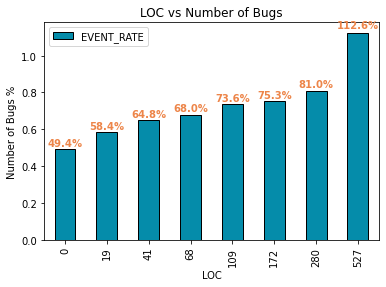

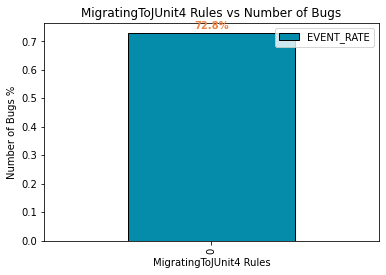

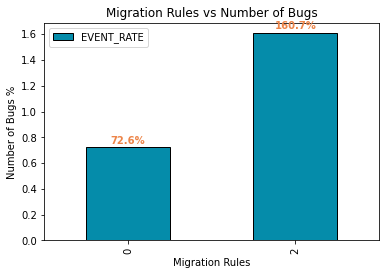

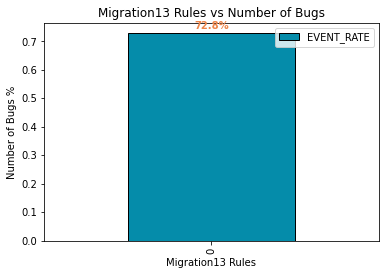

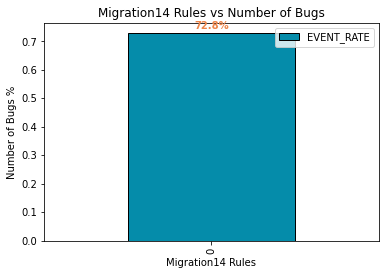

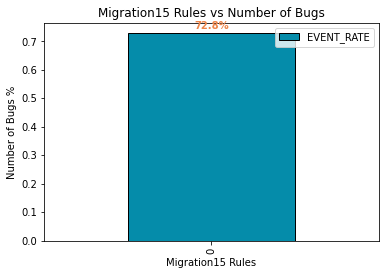

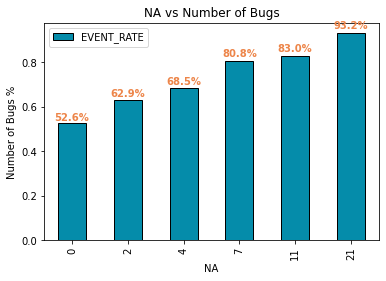

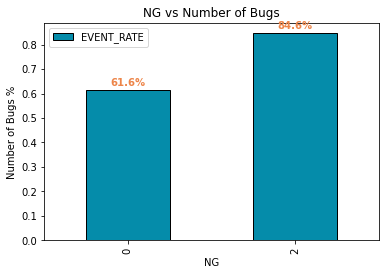

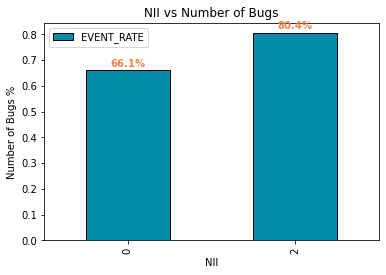

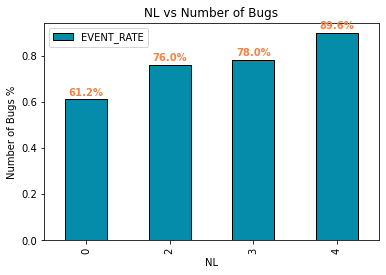

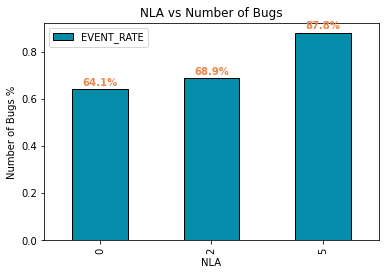

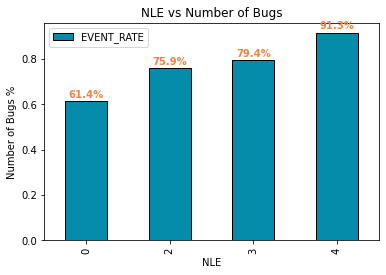

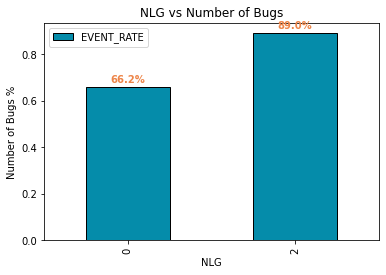

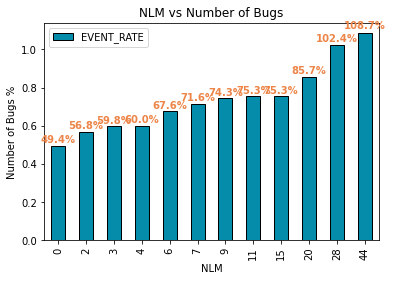

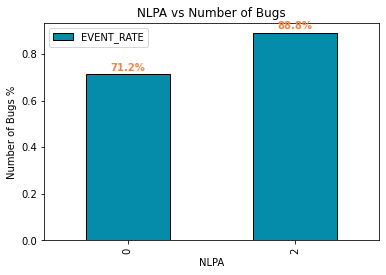

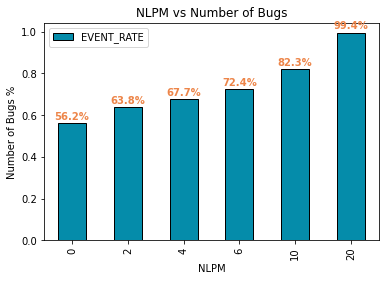

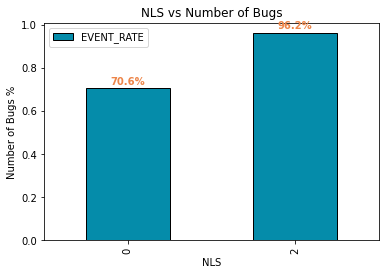

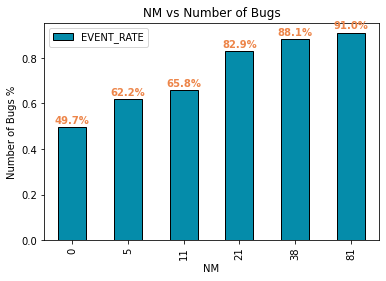

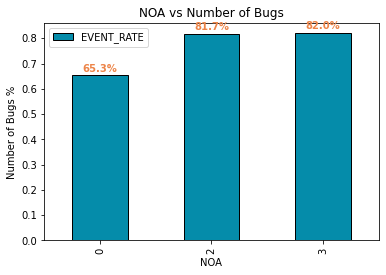

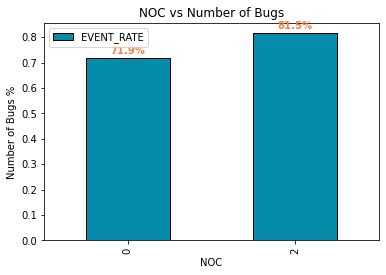

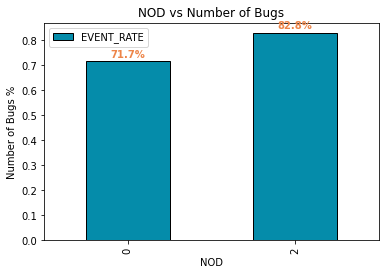

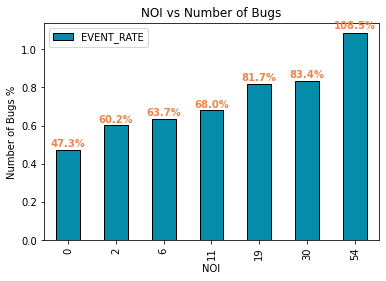

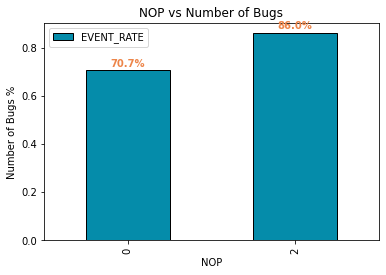

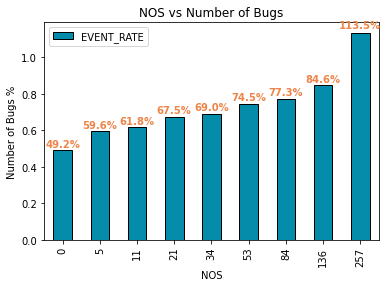

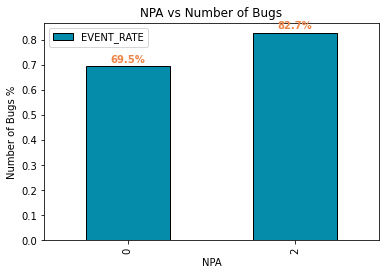

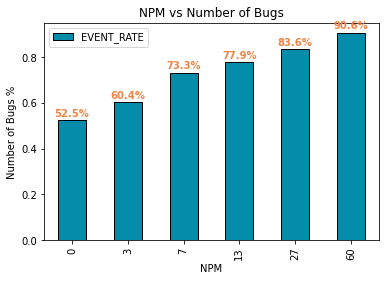

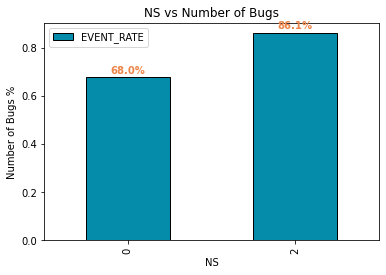

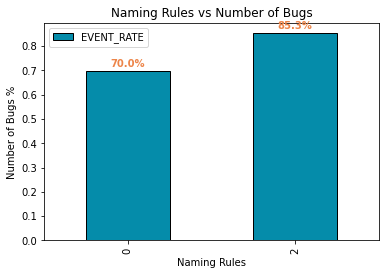

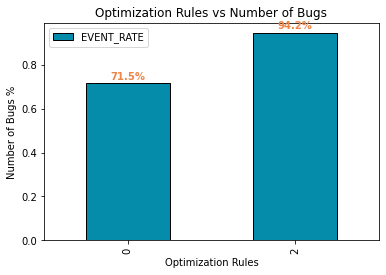

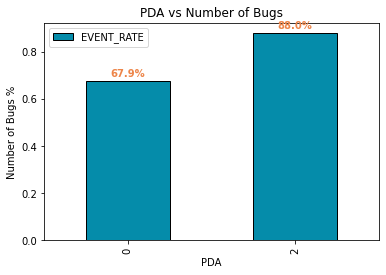

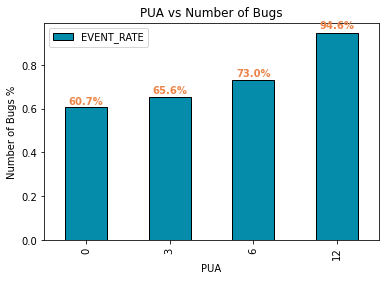

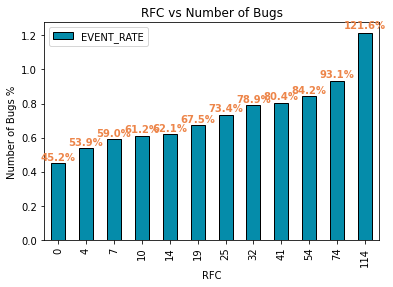

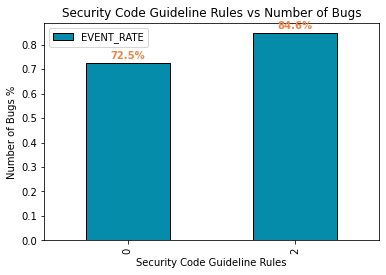

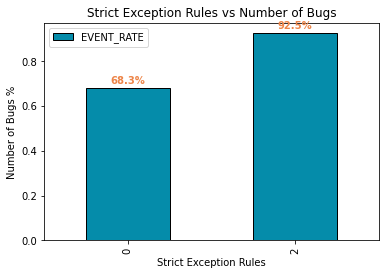

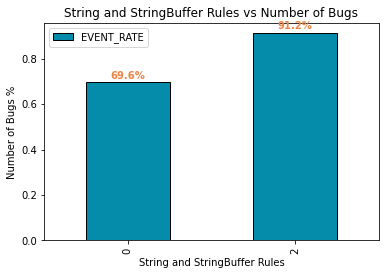

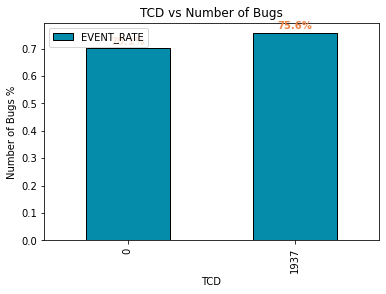

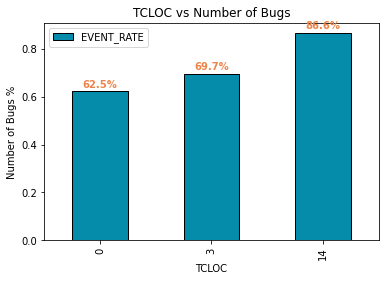

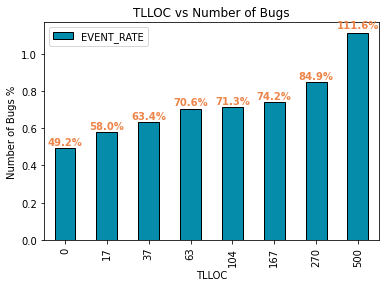

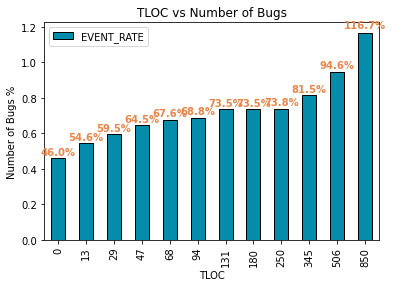

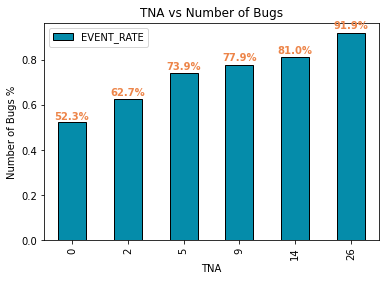

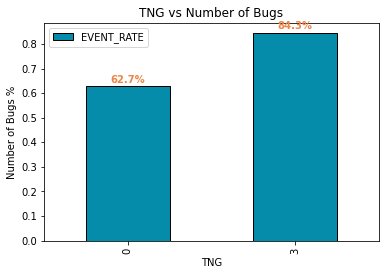

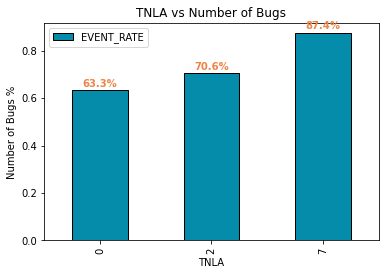

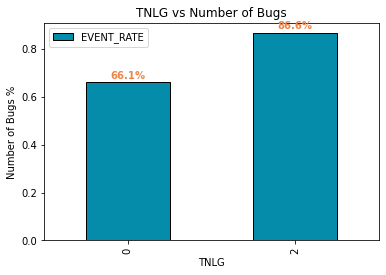

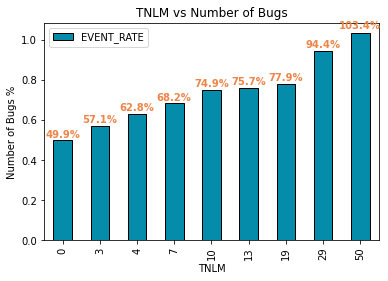

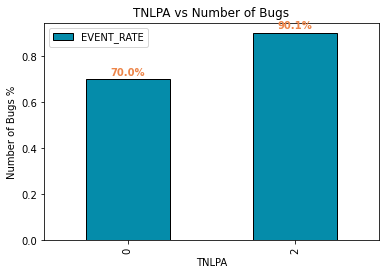

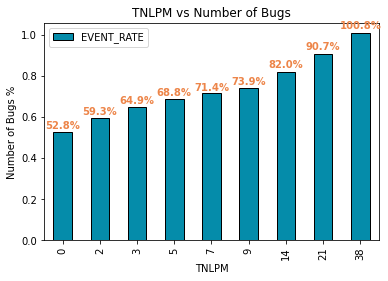

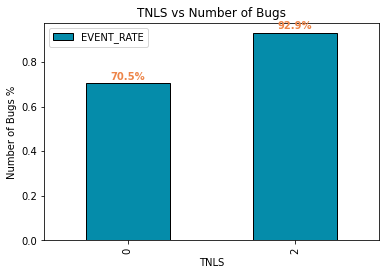

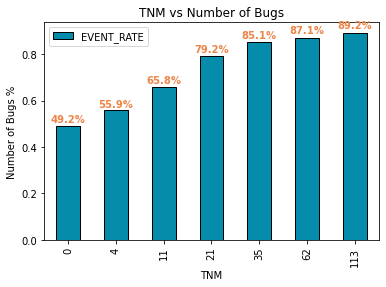

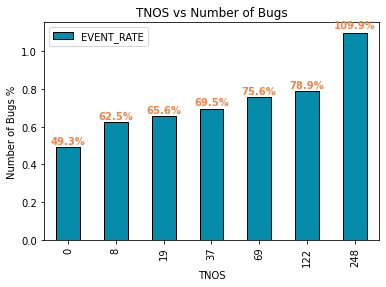

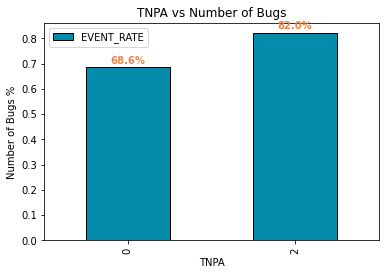

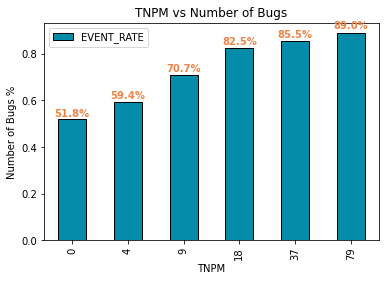

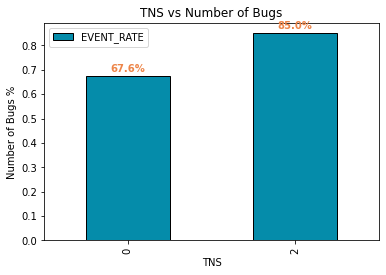

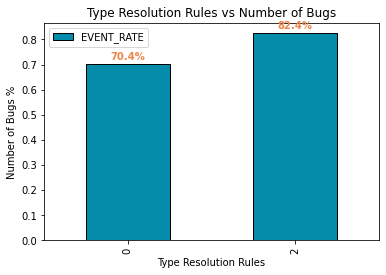

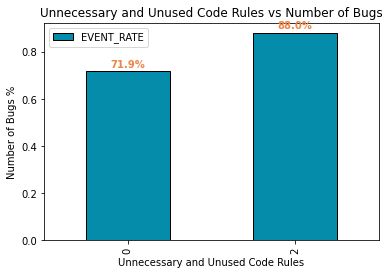

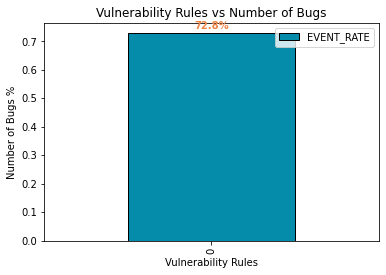

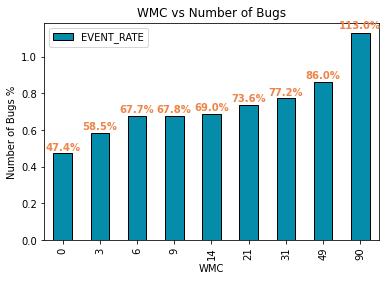

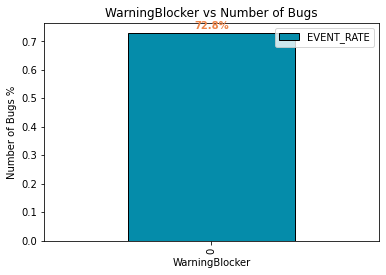

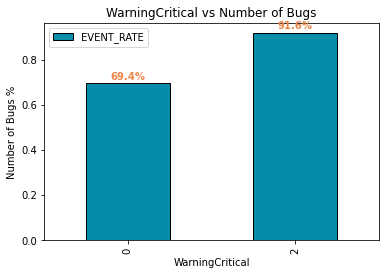

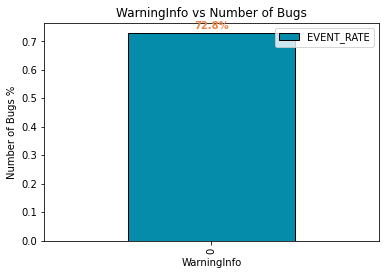

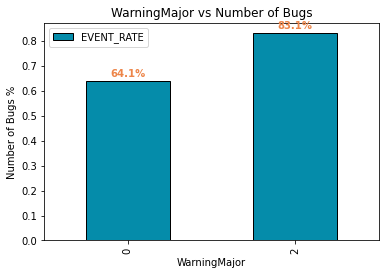

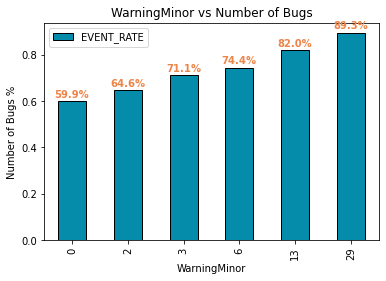

In [22]:
# look at bivariate plot for independent variables vs number of bugs variable

bar_color = '#058caa'
num_color = '#ed8549'

final_iv,_ = data_vars(df1,df1['Number of Bugs'])
final_iv = final_iv[(final_iv.VAR_NAME != 'Number of Bugs')]
grouped = final_iv.groupby(['VAR_NAME'])
for key, group in grouped:
    ax = group.plot('MIN_VALUE','EVENT_RATE',kind='bar',color=bar_color,linewidth=1.0,edgecolor=['black'])
    ax.set_title(str(key) + " vs " + str('Number of Bugs'))
    ax.set_xlabel(key)
    ax.set_ylabel(str('Number of Bugs') + " %")
    rects = ax.patches
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.01*height, str(round(height*100,1)) + '%', 
                ha='center', va='bottom', color=num_color, fontweight='bold')

In [31]:
# Calculate Multicollinearity Variance Inflation Factor of features 
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(features):
    vif = pd.DataFrame()
    vif["Features"] = features.columns
    return(vif)

vif = calculate_vif(features)


In [32]:
# split and train models based on Variance Inflation Factor of features 
from sklearn.model_selection import train_test_split

train, test = train_test_split(df1, test_size = 0.4)
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)

features_train = train[list(vif['Features'])]
label_train = train['Number of Bugs']
features_test = test[list(vif['Features'])]
label_test = test['Number of Bugs']

In [33]:
# Random forest prediction
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

clf.fit(features_train,label_train)

pred_train = clf.predict(features_train)
pred_test = clf.predict(features_test)

from sklearn.metrics import accuracy_score
accuracy_train = accuracy_score(pred_train,label_train)
accuracy_test = accuracy_score(pred_test,label_test)

# optimize Random forest prediction
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

n_estimators = [int(x) for x in np.linspace(start = 10, stop = 500, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(3, 10, num = 1)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf = RandomForestClassifier()

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(features_train, label_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\dmeiners\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   38.6s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   50.3s finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [3, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 64, 118, 173, 227,
                                                         282, 336, 391, 445,
                                                         500]},
                   random_state=42, verbose=2)

In [34]:
#observe performance of rando forest prediction
pd.crosstab(label_train,pd.Series(pred_train),rownames=['ACTUAL'],colnames=['PRED'])

PRED,0,1,2,3,4,5,6,7,8,10,11,12
ACTUAL,,,,,,,,,,,,
0,5960,85,19,3,0,0,0,0,0,0,0,0
1,217,3725,36,7,2,0,0,0,0,0,0,0
2,50,70,1270,18,1,0,0,0,0,0,0,0
3,8,13,20,331,2,0,0,0,0,0,0,0
4,0,3,3,5,77,1,0,0,0,0,0,0
5,1,1,2,0,1,36,0,0,0,0,0,0
6,0,0,0,0,0,2,11,1,0,0,0,0
7,0,0,0,0,0,0,0,8,0,0,0,0
8,0,0,0,0,0,0,0,0,5,0,0,0


In [35]:
from sklearn import metrics

metrics.f1_score(label_train, Series(pred_train), pos_label=list(set(label_train)), average = None)

C:\Users\dmeiners\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to [0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12]) is ignored when average != 'binary' (got None). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


array([0.96886938, 0.9449518 , 0.92062341, 0.89701897, 0.89534884,
       0.9       , 0.88      , 0.94117647, 1.        , 1.        ,
       1.        , 1.        ])

In [36]:
rf = RandomForestClassifier()

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 2, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(features_test, label_test)

#observe performance of rando forest prediction
pd.crosstab(label_test,pd.Series(pred_test),rownames=['ACTUAL'],colnames=['PRED'])

Fitting 2 folds for each of 10 candidates, totalling 20 fits


C:\Users\dmeiners\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   10.1s finished


PRED,0,1,2,3,4,5,6,7,8,10
ACTUAL,,,,,,,,,,
0,2911,1007,153,19,1,1,0,0,0,0
1,1636,769,156,39,3,0,1,0,0,0
2,464,259,148,57,7,3,0,0,0,0
3,102,56,60,18,9,0,0,0,0,0
4,18,11,5,8,13,3,0,2,0,0
5,8,3,2,2,2,12,0,1,0,0
6,3,3,0,0,0,4,1,3,0,0
7,1,1,2,0,0,0,0,1,0,0
8,1,0,1,0,0,0,0,0,1,0


In [37]:
#observe performance of rando forest prediction
metrics.f1_score(label_test, Series(pred_test), pos_label=list(set(label_test)), average = None)

C:\Users\dmeiners\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]) is ignored when average != 'binary' (got None). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


array([0.63008658, 0.32633142, 0.20204778, 0.09278351, 0.27368421,
       0.45283019, 0.125     , 0.125     , 0.5       , 0.        ,
       0.        , 0.        ])

## Conclusion

The results suggest a fairly effective model with random forest for predicting whether a person will book based on features which are important. Next steps for implementation of this model would be to subset the input data to show which users would book given a hotel cluster id and features that correlate with the users that book.  

In [30]:
References
https://github.com/Sundar0989/Variable-Selection-Using-Python/blob/master/Variable%20Selection%20using%20Python%20-%20Vote%20based%20approach.ipynb
https://towardsdatascience.com/end-to-end-python-framework-for-predictive-modeling-b8052bb96a78

SyntaxError: invalid syntax (<ipython-input-30-172cb5a75310>, line 2)